Step 1: CNN Classifier Source Code

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
# === Dataset Path ===
train_dir = r"C:\Users\admin\Desktop\object classification cat and Dog\Train"
val_dir = r"C:\Users\admin\Desktop\object classification cat and Dog\Validation"


In [6]:
# === Image Preprocessing ===
img_height, img_width = 150, 150
batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [12]:
# === CNN Model ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# === Training ===
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 1.4770
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.4770 - val_accuracy: 0.5000 - val_loss: 1.2259
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2259 - val_accuracy: 0.5000 - val_loss: 0.6879
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6879 - val_accuracy: 1.0000 - val_loss: 0.4895
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.4895 - val_accuracy: 0.6000 - val_loss: 0.5227
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.5227 - val_accuracy: 1.0000 - val_loss: 0.3100
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.3100 - val_accuracy: 0.9000 - val_loss: 0.2639
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.2639 - val_accuracy: 1.0000 - val_loss: 0.1431
Epoch 9/10
1/1

In [19]:
# === Save Model ===
model.save("cat_dog_classifier_model.h5")


In [21]:
# === Evaluate on Validation Set ===
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 1.0000 - loss: 0.0348
Validation Accuracy: 1.00


🖼️ Step 2: Show Predictions on Some Images


In [23]:
# Show few predictions from validation
import random
from tensorflow.keras.preprocessing import image


In [25]:
class_names = list(train_data.class_indices.keys())


In [27]:
def predict_random_images(num=5):
    val_folder = os.path.join(val_dir, random.choice(class_names))
    images = os.listdir(val_folder)
    samples = random.sample(images, num)

    for img_name in samples:
        img_path = os.path.join(val_folder, img_name)
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)[0][0]
        predicted_class = "Dog" if prediction > 0.5 else "Cat"

        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class} ({prediction:.2f})")
        plt.axis('off')
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


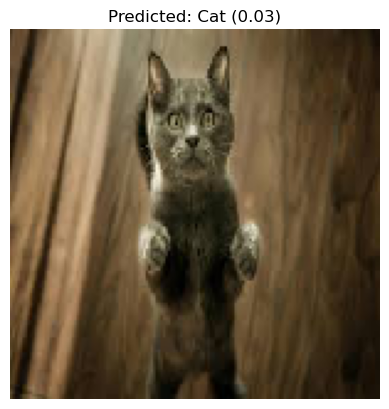

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


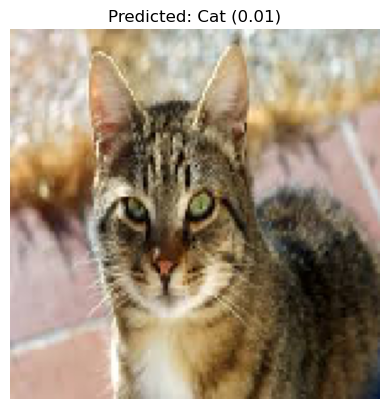

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


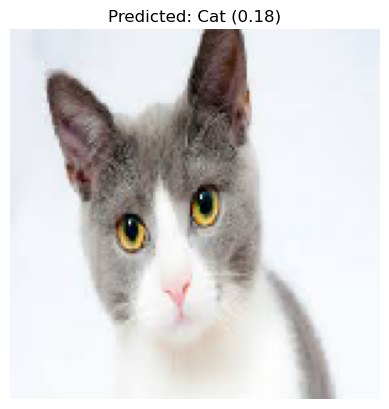

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


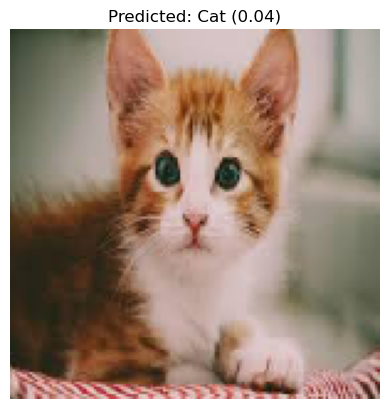

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


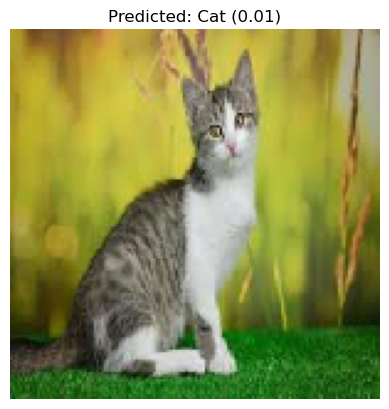

In [29]:
predict_random_images()


🚀 BONUS: Streamlit App for Live Prediction


In [70]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

In [72]:
#model = load_model("cat_dog_classifier_model.h5")


In [54]:
#import streamlit as st
#from tensorflow.keras.models import load_model
#from tensorflow.keras.preprocessing import image
#import numpy as np
#from PIL import Image

#st.title("🐱🐶 Cat vs Dog Classifier")

# Load the model without compiling (suppress warning)
#model = load_model("cat_dog_classifier_model.h5", compile=False)

#uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

#if uploaded_file:
    #img = Image.open(uploaded_file)
    #st.image(img, caption="Uploaded Image", use_column_width=True)

    #img = img.resize((150, 150))
    #img_array = image.img_to_array(img) / 255.0
    #img_array = np.expand_dims(img_array, axis=0)

    #prediction = model.predict(img_array)[0][0]
    #label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"

    # st.subheader(f"Prediction: {label}")



In [56]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load model
model_path = r"C:\Users\admin\Desktop\object classification cat and Dog\cat_dog_classifier_model.h5"
model = load_model(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [58]:
import streamlit as st
import tensorflow as tf

st.title("TensorFlow & Streamlit Test")

# Test TensorFlow version
st.write(f"TensorFlow version: {tf.__version__}")

# Test Streamlit functionality
st.write("Streamlit is working!")


In [60]:
!streamlit run cat_dog_streamlit.py


^C


In [62]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np
from PIL import Image

st.title("🐱🐶 Cat vs Dog Classifier")

# Load the model without compiling (suppress warning)
model = load_model(r"C:\Users\admin\Desktop\object classification cat and Dog\cat_dog_classifier_model.h5", compile=False)

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file:
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    img = img.resize((150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction and handle encoding
    prediction = model.predict(img_array)[0][0]
    label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"

    # Ensure proper encoding to avoid UnicodeEncodeError
    st.subheader(f"Prediction: {label}".encode("utf-8"))


In [68]:
!streamlit run cat_dog_streamlit.py


^C
